In [75]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from IPython.display import display
from mpl_toolkits import mplot3d

In [3]:
GPy.plotting.change_plotting_library('plotly_offline')

X = np.random.uniform(-3., 3., (20, 1))
Y = np.sin(X) + np.random.randn(20, 1) * 0.05

 C:\Users\bmwei\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.



In [18]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

m = GPy.models.GPRegression(X, Y, kernel)

display(m)

fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [19]:
m.optimize(messages=True)

m.optimize_restarts(num_restarts=10)

display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')


Optimization restart 1/10, f = -16.223956180317607
Optimization restart 2/10, f = -16.223956180188416
Optimization restart 3/10, f = -16.223956180321416
Optimization restart 4/10, f = -16.22395618028508
Optimization restart 5/10, f = -16.2239561802486
Optimization restart 6/10, f = -16.223956180272125
Optimization restart 7/10, f = -16.22395618031875
Optimization restart 8/10, f = -16.223956180322233
Optimization restart 9/10, f = -16.22395618031203
Optimization restart 10/10, f = -16.223956180321757


GP_regression.,value,constraints,priors
rbf.variance,1.61904087558015,+ve,
rbf.lengthscale,2.0905142873524443,+ve,
Gaussian_noise.variance,0.0021183463127484063,+ve,


In [45]:
#### 2D Example ####
# sample inputs and outputs
X = np.random.uniform(-3., 3., (50, 2))
Y = np.sin(X[:, 0:1]) * np.sin(X[:, 1:2]) + np.random.randn(50, 1) * 0.05

# define kernel
ker = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X, Y, ker)

# optimize and plot
m.optimize(messages=True, max_f_eval=1000)
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.3678171409297742,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.0014085733838956407,+ve,
Gaussian_noise.variance,0.0014085733838956407,+ve,


In [21]:
# Horizontal Slices
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1,
                                                shared_xaxes=True,
                                                subplot_titles=('slice at -1',
                                                                'slice at 0',
                                                                'slice at 1.5',
                                                                )
                                                )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i + 1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

In [22]:
# Vertical Slices
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1,
                                                shared_xaxes=True,
                                                subplot_titles=('slice at -1',
                                                                'slice at 0',
                                                                'slice at 1.5',
                                                                )
                                                )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0, y)], row=(i + 1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

In [55]:
#### Trento Example ####
datum = np.load("dat24.txt.npy")
pw24 = np.array([[datum[i,0], datum[i,1]] for i in range(len(datum))])
e224 = np.array([[datum[i,2]] for i in range(len(datum))])
e324 = np.array([[datum[i,3]] for i in range(len(datum))])

In [56]:
# define kernel
kerSmall = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
mSmall = GPy.models.GPRegression(pw24, e224, kerSmall)

# optimize and plot
mSmall.optimize(messages=True, max_f_eval=1000)
figSmall = mSmall.plot()
display(GPy.plotting.show(figSmall, filename='basic_gp_regression_notebook_2d'))
display(mSmall)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.3803267458258093,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.387954250289767e-06,+ve,
Gaussian_noise.variance,7.387954250289767e-06,+ve,


In [62]:
# Horizontal Slices
slices = [0.6, 0.75, 1.0]
figure = GPy.plotting.plotting_library().figure(3, 1,
                                                shared_xaxes=True,
                                                subplot_titles=('slice at 0.6',
                                                                'slice at 0.75',
                                                                'slice at 1.0',
                                                                )
                                                )
for i, y in zip(range(3), slices):
    canvas = mSmall.plot(figure=figure, fixed_inputs=[(1, y)], row=(i + 1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

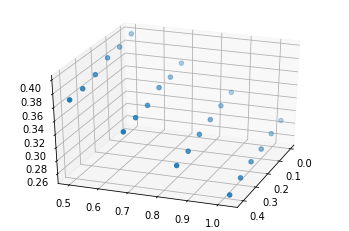

In [103]:
xx = mSmall.posterior.mean
ax = plt.axes(projection='3d')
ax.scatter(xs=pw24[:,0], ys=pw24[:,1], zs=xx)
ax.view_init(30, 20)

In [57]:
# define kernel
kerSmall2 = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
mSmall2 = GPy.models.GPRegression(pw24, e324, kerSmall2)

# optimize and plot
mSmall2.optimize(messages=True, max_f_eval=1000)
figSmall2 = mSmall2.plot()
display(GPy.plotting.show(figSmall2, filename='basic_gp_regression_notebook_2d'))
display(mSmall2)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.0591064339345813,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0978178943890319e-05,+ve,
Gaussian_noise.variance,1.0978178943890319e-05,+ve,


In [64]:
# Horizontal Slices
slices = [0.6, 0.75, 1.0]
figure = GPy.plotting.plotting_library().figure(3, 1,
                                                shared_xaxes=True,
                                                subplot_titles=('slice at 0.6',
                                                                'slice at 0.75',
                                                                'slice at 1.0',
                                                                )
                                                )
for i, y in zip(range(3), slices):
    canvas = mSmall2.plot(figure=figure, fixed_inputs=[(1, y)], row=(i + 1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

In [104]:
#### More Trento ####
datum = np.load("datPW.txt.npy")
pw = np.array([[datum[i,0], datum[i,1]] for i in range(len(datum))])
e2 = np.array([[datum[i,2]] for i in range(len(datum))])
e3 = np.array([[datum[i,3]] for i in range(len(datum))])

In [105]:
# define kernel
ker = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(pw, e2, ker)

# optimize and plot
m.optimize(messages=True, max_f_eval=1000)
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.17291571110252862,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.5929287005742126e-05,+ve,
Gaussian_noise.variance,1.5929287005742126e-05,+ve,


In [106]:
# define kernel
kernal = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

# create simple GP model
m2 = GPy.models.GPRegression(pw, e3, kernal)

# optimize and plot
m2.optimize(messages=True, max_f_eval=1000)
fig2 = m2.plot()
display(GPy.plotting.show(fig2, filename='basic_gp_regression_notebook_2d'))
display(m2)

None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.2061364042628425,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.696463074382194e-06,+ve,
Gaussian_noise.variance,7.696463074382194e-06,+ve,


In [109]:
slices = [0.6, 0.8, 1]
figure = GPy.plotting.plotting_library().figure(3, 1,
                                                shared_xaxes=True,
                                                subplot_titles=('slice at 0.6',
                                                                'slice at 0.8',
                                                                'slice at 1',
                                                                )
                                                )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i + 1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

In [110]:
# Vertical Slices
slices = [0, 0.25, 0.5]
figure = GPy.plotting.plotting_library().figure(3, 1,
                                                shared_xaxes=True,
                                                subplot_titles=('slice at 0',
                                                                'slice at 0.25',
                                                                'slice at 0.5',
                                                                )
                                                )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0, y)], row=(i + 1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

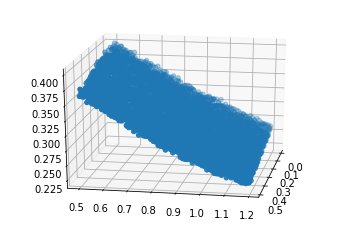

In [124]:
post = m.posterior.mean
ax = plt.axes(projection='3d')
ax.scatter(xs=pw[:,0], ys=pw[:,1], zs=post)
ax.view_init(20, 10)

In [24]:
Xnew = np.arange(242, dtype=float).reshape(121,2)
counter = 0
for i in range(11):
    for j in range(11):
        Xnew[counter, 0] = 0.2*i
        Xnew[counter, 1] = 0.4*j + 4
        counter += 1

In [126]:
mean, var = m.predict(np.array([[0.8,0.8]]))
print(mean[0,0], '+-', np.sqrt(var[0,0]))

0.27702058571147603 +- 0.026350080321217027


In [125]:
mean2, var2 = m2.predict(np.array([[0.8,0.8]]))
print(mean2[0,0], '+-', np.sqrt(var2[0,0]))

0.1863438015462009 +- 0.01742442116193781


In [127]:
def prior():
    return 1

def likelihood(params, data):
    res = 0.0
    norm = 1.
    # Sum over observables
    for obs_name2 in obs_d.keys():
        data_mean2 = data[obs_name2]['mean']
        data_uncert2 = data[obs_name2]['uncert']
        param_name_list2 = list(parameter_d.keys())
        x_param_name2 = param_name_list2[0]
        x_value = params[x_param_name2]

        tmp_model_mean = emul_d[obs_name2]['mean']
        tmp_model_uncert = emul_d[obs_name2]['uncert']
        tmp_data_mean = data_mean2
        tmp_data_uncert = data_uncert2
        if not isinstance(x_value, (int, np.float64, float)):
            nn = int((x_value[0] - xmin) * nlenp * nlenx / 2)
        else:
            nn = int((x_value - xmin) * nlenp * nlenx / 2)

        tmp_model_mean = np.array(tmp_model_mean)[0:nlenx]  # .reshape((nlenp, nlenx))[nn]
        tmp_model_uncert = np.array(tmp_model_uncert)[0:nlenx]  # .reshape((nlenp, nlenx))[nn]
        cov = (np.multiply(tmp_model_uncert, tmp_model_uncert) + np.multiply(tmp_data_uncert, tmp_data_uncert))
        res += np.divide(np.power(tmp_model_mean - tmp_data_mean, 2), cov)
        norm *= 1 / np.sqrt(cov)
    res *= -0.5
    return norm * np.exp(res)


def posterior(params, data):
    return prior() * likelihood(params, data)